<a href="https://colab.research.google.com/github/FilipKatulski/international-capital-investments/blob/main/sp_etf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# S&P500 ETF i S&P500

Filip Katulski

In [ ]:
import pandas as pd

In [ ]:
df_sp = pd.read_csv('./ETFSP.csv', sep=';', parse_dates=['DateTime'], dayfirst=True) \
  .dropna() \
  .rename(columns={'S&P500 Net TR': 'SP'})
df_sp['ETF'] = df_sp['ETF'].str.replace(',', '.').astype(float)
df_sp['SP'] = df_sp['SP'].str.replace(',', '.').astype(float)

In [ ]:
df_sp

,DateTime,ETF,SP
0,2011-05-31,37.46,5863.85
1,2011-06-01,36.52,5716.94
2,2011-06-02,36.51,5714.51
3,2011-06-03,35.77,5598.22
4,2011-06-06,35.30,5524.75
...,...,...,...
2737,2022-05-10,217.28,32737.82
2738,2022-05-11,213.10,32107.17
2739,2022-05-12,215.50,32465.40
2740,2022-05-18,212.05,31942.30


In [ ]:
df_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742 entries, 0 to 2741
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  2742 non-null   datetime64[ns]
 1   ETF       2742 non-null   float64       
 2   SP        2742 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 64.4 KB


## Daily returns

In [ ]:
df_sp_daily = df_sp.copy()
df_sp_daily['ETF'] = df_sp['ETF'].pct_change(1)
df_sp_daily['SP'] = df_sp['SP'].pct_change(1)

In [ ]:
df_sp_daily

,DateTime,ETF,SP
0,2011-05-31,NaN,NaN
1,2011-06-01,-0.025093,-0.025054
2,2011-06-02,-0.000274,-0.000425
3,2011-06-03,-0.020268,-0.020350
4,2011-06-06,-0.013140,-0.013124
...,...,...,...
2737,2022-05-10,-0.032376,0.005821
2738,2022-05-11,-0.019238,-0.019264
2739,2022-05-12,0.011262,0.011157
2740,2022-05-18,-0.016009,-0.016113


## Weekly returns

In [ ]:
df_sp_weekly = df_sp_daily.groupby(pd.Grouper(key='DateTime', freq='W')).sum()
df_sp_weekly

,ETF,SP
DateTime,,
2011-06-05,-0.045636,-0.045829
2011-06-12,-0.013001,-0.012907
2011-06-19,0.014746,0.014760
2011-06-26,0.010859,0.010990
2011-07-03,0.023044,0.022847
...,...,...
2022-04-24,-0.024316,-0.024314
2022-05-01,-0.003309,-0.003368
2022-05-08,0.001679,-0.036082


## Monthly returns

In [ ]:
df_sp_monthly = df_sp_daily.groupby(pd.Grouper(key='DateTime', freq='M')).sum()
df_sp_monthly

,ETF,SP
DateTime,,
2011-05-31,0.000000,0.000000
2011-06-30,-0.017609,-0.017709
2011-07-31,-0.005369,-0.005165
2011-08-31,-0.015586,-0.015708
2011-09-30,0.061315,0.061529
...,...,...
2022-01-31,-0.036065,-0.036190
2022-02-28,-0.005350,-0.005699
2022-03-31,0.035088,0.034812


## Plot returns

In [ ]:
import matplotlib.pyplot as plt

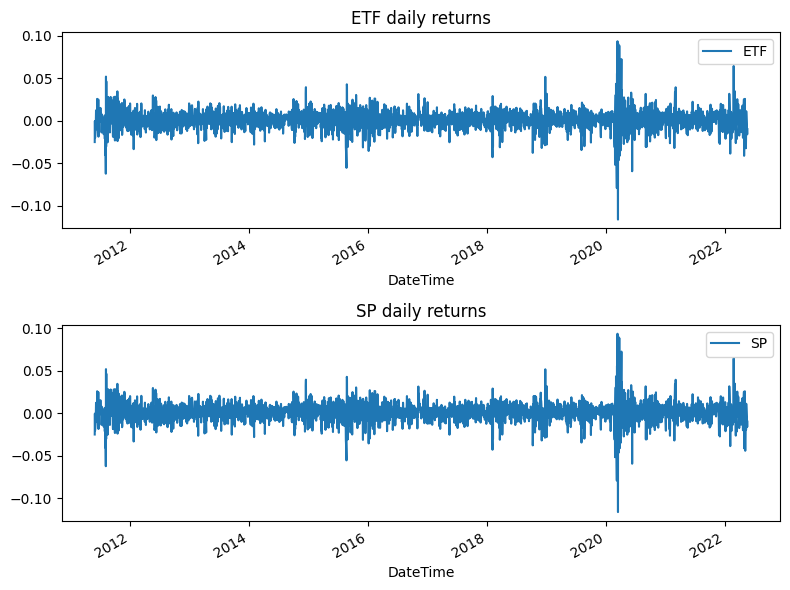

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
df_sp_daily.plot(x='DateTime', y='ETF', title='ETF daily returns', ax=ax[0])
df_sp_daily.plot(x='DateTime', y='SP', title='SP daily returns', ax=ax[1])
plt.tight_layout()
plt.show()

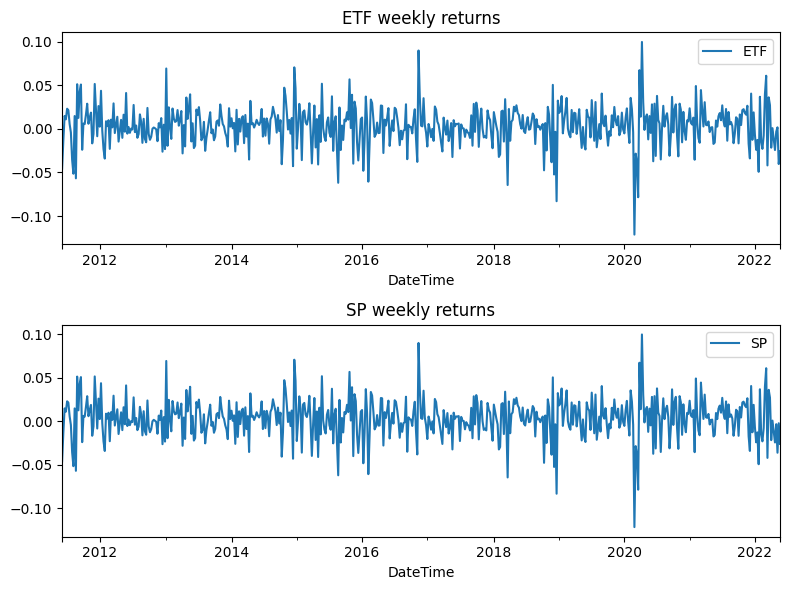

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
df_sp_weekly.reset_index().plot(x='DateTime', y='ETF', title='ETF weekly returns', ax=ax[0])
df_sp_weekly.reset_index().plot(x='DateTime', y='SP', title='SP weekly returns', ax=ax[1])
plt.tight_layout()
plt.show()

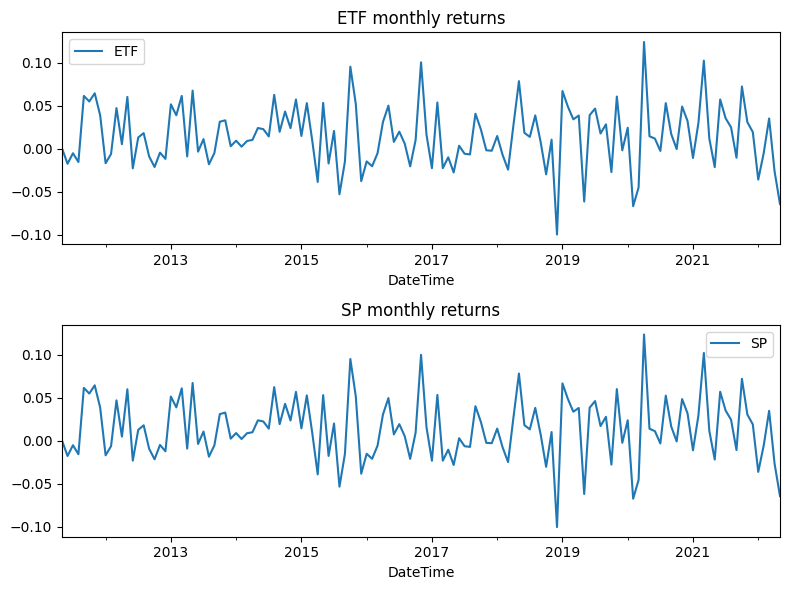

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
df_sp_monthly.reset_index().plot(x='DateTime', y='ETF', title='ETF monthly returns', ax=ax[0])
df_sp_monthly.reset_index().plot(x='DateTime', y='SP', title='SP monthly returns', ax=ax[1])
plt.tight_layout()
plt.show()

## Cumulative returns

In [ ]:
df_sp_daily['ETF_cum'] = df_sp_daily['ETF'].add(1).cumprod() - 1
df_sp_daily['SP_cum'] = df_sp_daily['SP'].add(1).cumprod() - 1
df_sp_weekly['ETF_cum'] = df_sp_weekly['ETF'].add(1).cumprod() - 1
df_sp_weekly['SP_cum'] = df_sp_weekly['SP'].add(1).cumprod() - 1
df_sp_monthly['ETF_cum'] = df_sp_monthly['ETF'].add(1).cumprod() - 1
df_sp_monthly['SP_cum'] = df_sp_monthly['SP'].add(1).cumprod() - 1

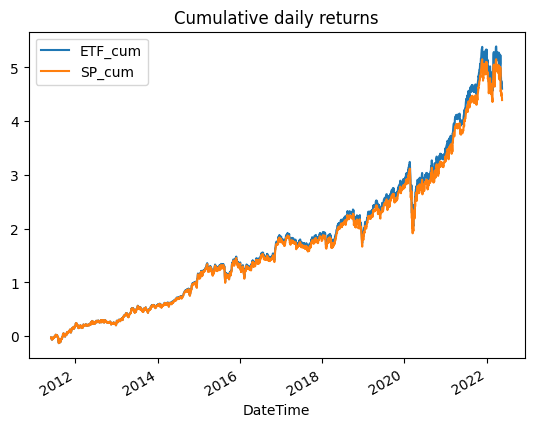

In [ ]:
df_sp_daily.plot(x='DateTime', y=['ETF_cum', 'SP_cum'], title='Cumulative daily returns')
plt.show()

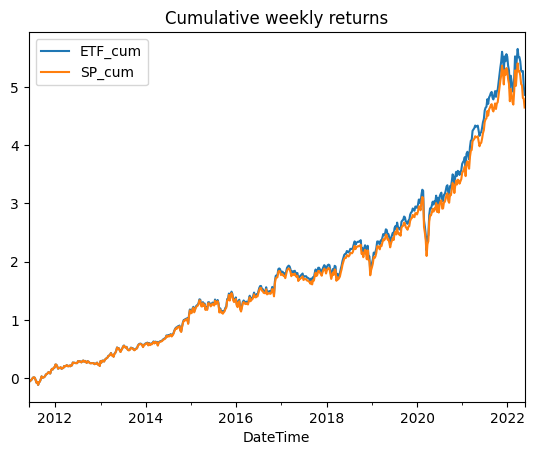

In [ ]:
df_sp_weekly.reset_index().plot(x='DateTime', y=['ETF_cum', 'SP_cum'], title='Cumulative weekly returns')
plt.show()

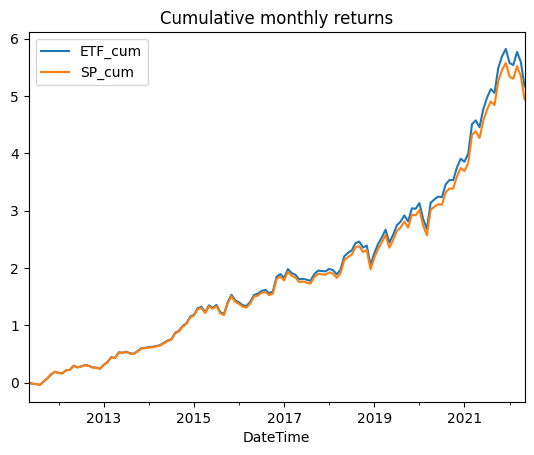

In [ ]:
df_sp_monthly.reset_index().plot(x='DateTime', y=['ETF_cum', 'SP_cum'], title='Cumulative monthly returns')
plt.show()

## Correlation

In [ ]:
df_sp[['ETF', 'SP']].corr()

,ETF,SP
ETF,1.000000,0.999957
SP,0.999957,1.000000


In [ ]:
df_sp_daily[['ETF', 'SP']].corr()

,ETF,SP
ETF,1.00000,0.99622
SP,0.99622,1.00000


In [ ]:
df_sp_weekly[['ETF', 'SP']].corr()

,ETF,SP
ETF,1.000000,0.994993
SP,0.994993,1.000000


In [ ]:
df_sp_monthly[['ETF', 'SP']].corr()

,ETF,SP
ETF,1.000000,0.999991
SP,0.999991,1.000000


## t-test

In [ ]:
from scipy.stats import pearsonr

In [ ]:
pd.DataFrame([
  pearsonr(df_sp['ETF'], df_sp['SP']),
  pearsonr(df_sp_daily.dropna()['ETF'], df_sp_daily.dropna()['SP']),
  pearsonr(df_sp_weekly['ETF'], df_sp_weekly['SP']),
  pearsonr(df_sp_monthly['ETF'], df_sp_monthly['SP']),
], index=['price', '1d', '1w', '1m'])

,statistic,pvalue
price,0.999957,0.000000e+00
1d,0.996220,0.000000e+00
1w,0.994993,0.000000e+00
1m,0.999991,7.149101e-314


## Normality test

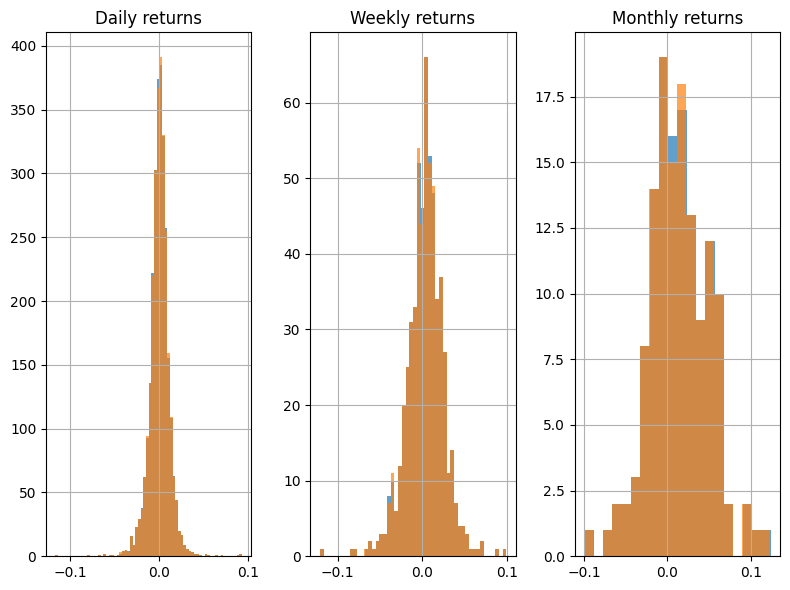

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(8, 6))
df_sp_daily.hist('ETF', bins=70, ax=ax[0], alpha=0.7)
df_sp_daily.hist('SP', bins=70, ax=ax[0], alpha=0.7)
ax[0].set_title("Daily returns")

df_sp_weekly.hist('ETF', bins=50, ax=ax[1], alpha=0.7)
df_sp_weekly.hist('SP', bins=50, ax=ax[1], alpha=0.7)
ax[1].set_title("Weekly returns")

df_sp_monthly.hist('ETF', bins=20, ax=ax[2], alpha=0.7)
df_sp_monthly.hist('SP', bins=20, ax=ax[2], alpha=0.7)
ax[2].set_title("Monthly returns")

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import shapiro, jarque_bera, norm, kstest

#### Shapiro

In [ ]:
pd.DataFrame([
  shapiro(df_sp_daily.dropna()['ETF']),
  shapiro(df_sp_daily.dropna()['SP']),
  shapiro(df_sp_weekly.dropna()['ETF']),
  shapiro(df_sp_weekly.dropna()['SP']),
  shapiro(df_sp_monthly.dropna()['ETF']),
  shapiro(df_sp_monthly.dropna()['SP'])
], index=['ETF1d', 'SP1d', 'ETF1w', 'SP1w', 'ETF1m', 'SP1m'])

,statistic,pvalue
ETF1d,0.913410,5.513344e-37
SP1d,0.912928,4.596991e-37
ETF1w,0.969046,1.230581e-09
SP1w,0.969119,1.274603e-09
ETF1m,0.990785,5.295917e-01
SP1m,0.990893,5.401679e-01


#### Jarque Bera

In [ ]:
pd.DataFrame([
  jarque_bera(df_sp_daily.dropna()['ETF']),
  jarque_bera(df_sp_daily.dropna()['SP']),
  jarque_bera(df_sp_weekly.dropna()['ETF']),
  jarque_bera(df_sp_weekly.dropna()['SP']),
  jarque_bera(df_sp_monthly.dropna()['ETF']),
  jarque_bera(df_sp_monthly.dropna()['SP'])
], index=['ETF1d', 'SP1d', 'ETF1w', 'SP1w', 'ETF1m', 'SP1m'])

,statistic,pvalue
ETF1d,12706.428366,0.000000e+00
SP1d,12693.310705,0.000000e+00
ETF1w,220.919834,1.066271e-48
SP1w,221.616155,7.527721e-49
ETF1m,2.065473,3.560313e-01
SP1m,2.042612,3.601243e-01


#### KS-test

In [ ]:
pd.DataFrame([
  kstest(df_sp_daily.dropna()['ETF'], norm.cdf),
  kstest(df_sp_daily.dropna()['SP'], norm.cdf),
  kstest(df_sp_weekly.dropna()['ETF'], norm.cdf),
  kstest(df_sp_weekly.dropna()['SP'], norm.cdf),
  kstest(df_sp_monthly.dropna()['ETF'], norm.cdf),
  kstest(df_sp_monthly.dropna()['SP'], norm.cdf)
], index=['ETF1d', 'SP1d', 'ETF1w', 'SP1w', 'ETF1m', 'SP1m'])

,statistic,pvalue
ETF1d,0.479957,0.000000e+00
SP1d,0.479836,0.000000e+00
ETF1w,0.469088,3.859285e-116
SP1w,0.469088,3.859583e-116
ETF1m,0.465773,5.875327e-27
SP1m,0.465609,6.148309e-27


## Wnioski

W sekcjach poświęconych stopom zwrotu można zauważyć, że ogólnym trendem dla ETF jest jest odzwierciedlanie funkcji stopy zwrotu S&P500. 

Skumulowane stopy zwrotu ETF również bardzo dobrze odzwierciedlają zachowanie indeksu.  

Ceny S&P500 i ETF oraz ich stopy zwrotu są skorelowane, o czym świadczą testy na korelację.

Obliczony współczynnik Pearsona jest bliski wartości 1, co oznacza niemal liniowe odzwrotowanie, co potwierdza pierwszy wniosek. Dodatkowo p-value jest równa zeru. 

Przeprowadzone testy normalności wskazują wysokie dopasowanie do rozkładu normalnego.